In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [126]:
df = pd.read_csv('/workspaces/ml-zoomcamp-hw/03-Classification/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)


In [127]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

In [128]:
df.churn = (df.churn == 'yes').astype(int)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [129]:
del df_train['churn']
del df_val['churn']
del df_test['churn']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]
dv = DictVectorizer(sparse=False)



In [130]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
LogisticRegression()
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

In [131]:
churn_decision

array([False, False, False, ..., False,  True,  True], shape=(1409,))

Module 4 Code 

In [132]:
len(y_val)

1409

In [133]:
(y_val == churn_decision).sum()

np.int64(1132)

In [134]:
from sklearn.metrics import accuracy_score

In [135]:
scores = []

thresholds = np.linspace(0, 1, 21)

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.513
0.10 0.608
0.15 0.661
0.20 0.703
0.25 0.734
0.30 0.758
0.35 0.765
0.40 0.782
0.45 0.791
0.50 0.803
0.55 0.801
0.60 0.796
0.65 0.789
0.70 0.766
0.75 0.742
0.80 0.729
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


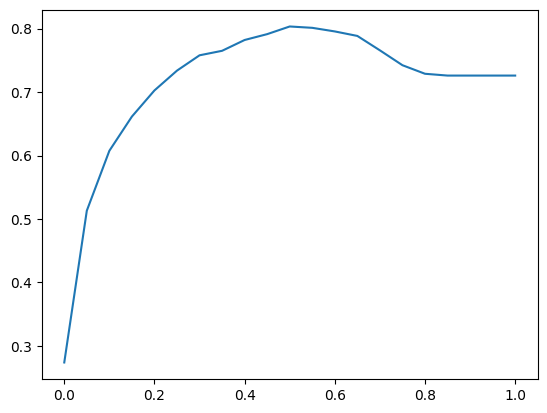

In [136]:
plt.plot(thresholds, scores)

In [137]:
from collections import Counter

In [138]:
Counter(y_pred >= 1.0)

Counter({np.False_: 1409})

In [139]:
y_val.mean()
#27% of tthe data has people churning

np.float64(0.2739531582682754)

In [140]:
1 - y_val.mean()
#73% of the data is people non churning
#This created class imbalance, more costumers non churning than churning 3:1
#Accuracy not a great score for class imbalance

np.float64(0.7260468417317246)

Confusion Table

In [141]:
actual_postive = (y_val == 1)
actual_negative = (y_val ==0)

In [142]:
actual_negative, actual_postive


(array([ True,  True,  True, ...,  True, False, False], shape=(1409,)),
 array([False, False, False, ..., False,  True,  True], shape=(1409,)))

In [143]:
t = 0.5
predict_positive = (y_pred >=t)
predict_negative = (y_pred < t)

In [144]:
predict_positive[:10],actual_postive[:10]

(array([False, False, False,  True, False, False, False, False,  True,
        False]),
 array([False, False, False,  True, False, False, False, False,  True,
         True]))

In [145]:
tp = (predict_positive & actual_postive).sum()
fp = (predict_positive & actual_negative).sum()

tn = (predict_negative & actual_negative).sum()
fn = (predict_negative & actual_postive).sum()

In [146]:
tp, tn, fp, fn

(np.int64(212), np.int64(920), np.int64(103), np.int64(174))

In [147]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

In [148]:
confusion_matrix

array([[920, 103],
       [174, 212]])

In [149]:
(confusion_matrix/confusion_matrix.sum()).round(3)

array([[0.653, 0.073],
       [0.123, 0.15 ]])

Precision and Recall

In [150]:
#Accuracy
(tp + tn)/(tp + tn + fp +fn)


np.float64(0.8034066713981547)

In [ ]:
#Precision 
#Tells us the fraction of positive predictions that are correct 
#True positives divided by true positi
# 
# 
# 
# 
# 
# 
# 
# ves + false positives
#Looking at true and  false predicted postiives
#TP/TP + FP
p = (tp/(tp+fp))
p

np.float64(0.6730158730158731)

In [152]:
tp + fp

np.int64(315)

In [153]:
#Recall
#Fraction that calculates the proportion of actual positives that were correctly identified
#Number of predicted true positives/total positive observations (true + false negatives)
#In this case looking at all the customers that are churning, all true positives.
#TP/( TP + FN)
r = (tp/(tp+fn))
r
#We only correctly identified 54% of the total of customers churning

np.float64(0.5492227979274611)

In [154]:
#False positive rate
FPR = fp/(tn + fp)

#True postive rate
TPR = tp/(tp + fn)
TPR

np.float64(0.5492227979274611)

In [156]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_postive = (y_val == 1)
    actual_negative = (y_val == 0)
    

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_postive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_postive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [164]:
columns = ['thresholds', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores[::10]

thresholds   tp    fp   fn    tn
0           0.0  386  1023    0     0
10          0.1  366   533   20   490
20          0.2  339   372   47   651
30          0.3  292   247   94   776
40          0.4  254   175  132   848
50          0.5  212   103  174   920
60          0.6  151    53  235   970
70          0.7   69    13  317  1010
80          0.8    4     0  382  1023
90          0.9    0     0  386  1023
100         1.0    0     0  386  1023

In [ ]:
df_scores.tpr = df_scores.tp(df_scores.tp + df_scores.fn)